# 2025-2, PHYS312 Computational Physics, Homework #2

---
# Problem 1 (Practice)



Write a function that solves a system of linear equations of arbitrary size of the form $\mathbf{Ax}=\mathbf{v}$ with a square matrix $\mathbf{A}$ and a vector $\mathbf{v}$ as inputs. Use the scipy.linalg.lu function to obtain the $\mathbf{P}, \mathbf{L}, \mathbf{U}$ matrices.

Use the function solve the linear equation for
\begin{equation}
\mathbf{A} =
\left(\begin{array}{cccc}
2 & 1 & 4 & 1\\
3 & 4 & -1 & -1\\
1 & -4 & 1 & 5\\
2 & -2 & 1 & 3
\end{array}\right),\\
\mathbf{v} = \left(\begin{array}{c}
-4\\
3\\
9\\
7
\end{array}\right).
\end{equation}

Compare the result with that obtained using the scipy.linalg.solve function. Also compare the result with that obtained using the scipy.linalg.inv function.

---
# Problem 2 (Practice)



In the mean-field theory of ferromagnetism, the strength $M$ of magnetization of a ferromagnetic material like iron depends on temperature $T$ according to the formula
\begin{align*}
M = \mu \tanh\frac{JM}{k_B T},
\end{align*}
where $\mu$ is the magnetic moment, $J$ is a coupling constant, and $k_B$ is Boltzmann's constant. Making the substitutions $m=M/\mu$ and $T_c=\mu J/k_B$ yield
\begin{align*}
m =  \tanh\frac{m}{T/T_c}.
\end{align*}

(a) Plot $f(m)=m-\tanh\frac{m}{T/T_c}$ as a function of $m$, for values $T=0.1T_c, 0.5T_c, 0.9T_c, 2T_c$. Can you guess the range of $T$ for which a non-trivial solution ($m > 0$) to $f(m)=0$ exists?

(b) Use the bisection method to find the magnetization $m\geq 0$ as a function of $T/T_c$ for $T\in(0,2T_c]$ with an error to 10 decimal places. On a separate plot, plot the number of iterations per point.

(c) Repeat using the Newton's method and the Secant method.

(d) For $T=T_c/2$, compare the running time of all methods.

---
# Problem 3




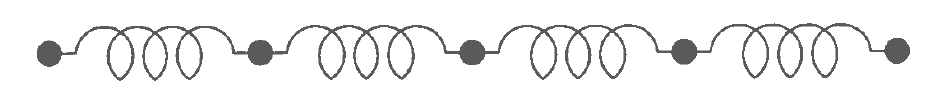

Suppose we have a set of $N$ identical masses with mass $m$ in a row, joined by identical linear springs with identical spring constants $k$. If we jostle this system them masses will vibrate relative to one another under the action of the springs. The motions of the system could be used as a model of the vibration of atoms in a solid.

Let us denote the displacement of the $i$th mass relative to its rest position by $\xi_i$, and any external force acting on it by $F_i$. The equation of motion for the $i$th mass can be written as
\begin{align*}
  m \frac{d^2\xi_i}{dt^2}=k(\xi_{i+1}-\xi_i)+k(\xi_{i-1}-\xi_i)+F_i.
\end{align*}

(a) Suppose that $F_1=C e^{i\omega t}$ and $F_{i\neq 1}=0$, i.e., we shake the first mass. The overall solution for $\xi_i$ will take the form $\xi_i(t)=x_i e^{i\omega t}$. Show that the system can be represented as a linear problem of the form $\mathbf{A}\mathbf{x}=\mathbf{v}$.

(b) For $N=26, C=1, m=1, k=6, \omega=2$, solve the system for $x_i$ using the function obtained in Problem 1.

(c) Plot $i$ vs. $x_i$. Describe in words what the result means physically.

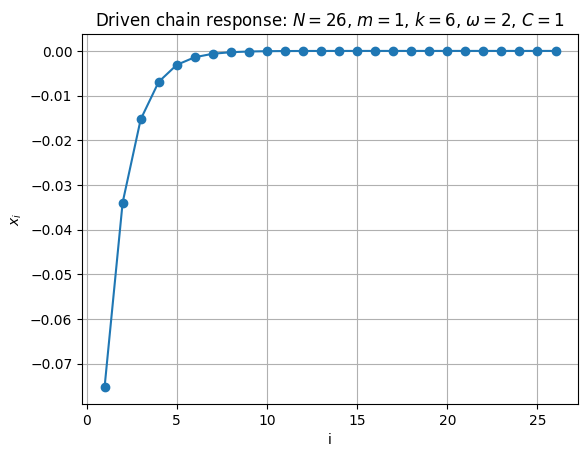

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 26
C = 1.0
m = 1.0
k = 6.0
w = 2.0

diag = np.full(N, -(2*k + m*w*w))
off = np.full(N-1, k)
A = np.diag(diag) + np.diag(off, 1) + np.diag(off, -1)

v = np.zeros(N)
v[0] = C

x = np.linalg.solve(A, v)

i = np.arange(1, N+1)
plt.figure()
plt.plot(i, x, marker='o')
plt.xlabel('i')
plt.ylabel(r'$x_i$')
plt.title('Driven chain response: $N=26$, $m=1$, $k=6$, $\omega=2$, $C=1$')
plt.grid(True)
plt.show()

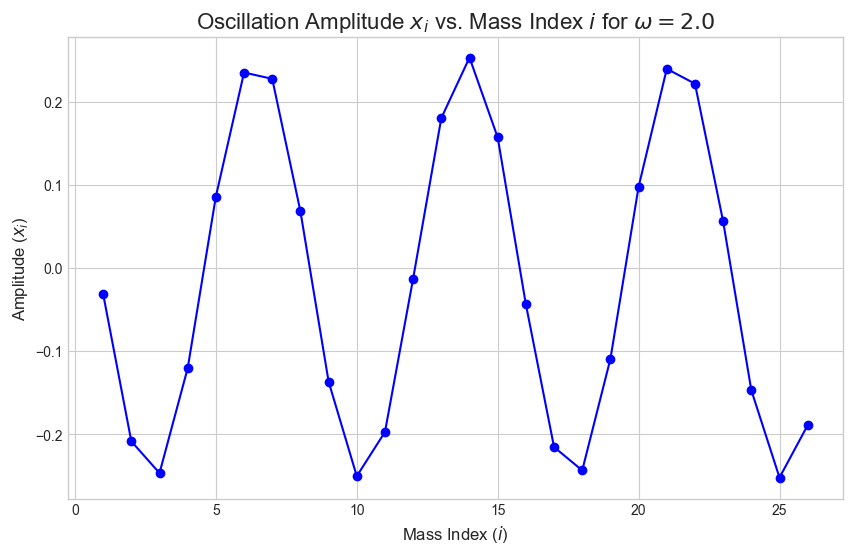

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Part (b): Solve the system ---

# Define the parameters of the system
N = 26      # Number of masses
C = 1.0     # Amplitude of the driving force
m = 1.0     # Mass
k = 6.0     # Spring constant
omega = 2.0   # Driving frequency

# Construct the matrix A
alpha = 2 * k - m * omega**2
beta = -k

A = np.zeros((N, N))

# Fill the diagonal
np.fill_diagonal(A, alpha)

# Fill the super-diagonal and sub-diagonal
A_sub = np.diag([beta] * (N - 1), k=-1)
A_super = np.diag([beta] * (N - 1), k=1)

A = A + A_sub + A_super

# Construct the vector v
v = np.zeros(N)
v[0] = C

# Solve the linear system Ax = v
x = np.linalg.solve(A, v)

# --- Part (c): Plotting ---

# Create an array for the mass index i
i_values = np.arange(1, N + 1)

# Generate the plot
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(i_values, x, marker='o', linestyle='-', color='b')
ax.set_title(f'Oscillation Amplitude $x_i$ vs. Mass Index $i$ for $\omega={omega}$', fontsize=16)
ax.set_xlabel('Mass Index ($i$)', fontsize=12)
ax.set_ylabel('Amplitude ($x_i$)', fontsize=12)
ax.grid(True)
plt.show()

---
# Problem 4



Consider the degree-six polynomial (the sixth Legendre polynomial)
\begin{align*}
  P(x) = 924 x^6 - 2772 x^5 + 3150 x^4 -1680x^3 +420 x^2 -42 x +1
\end{align*}
There is no general formula for the roots of a polynomial of degree six, but one can find them easily enouhg using a computer.

(a) Make a plot of $P(x)$ from $x=0$ to $x=1$ and by inspecting in find rough values for the six roots of the polynomial.

(b) Write a code to solve for the positions of all six roots to ten decimal places of accuracy, using Newton's method.

---
# Problem 5


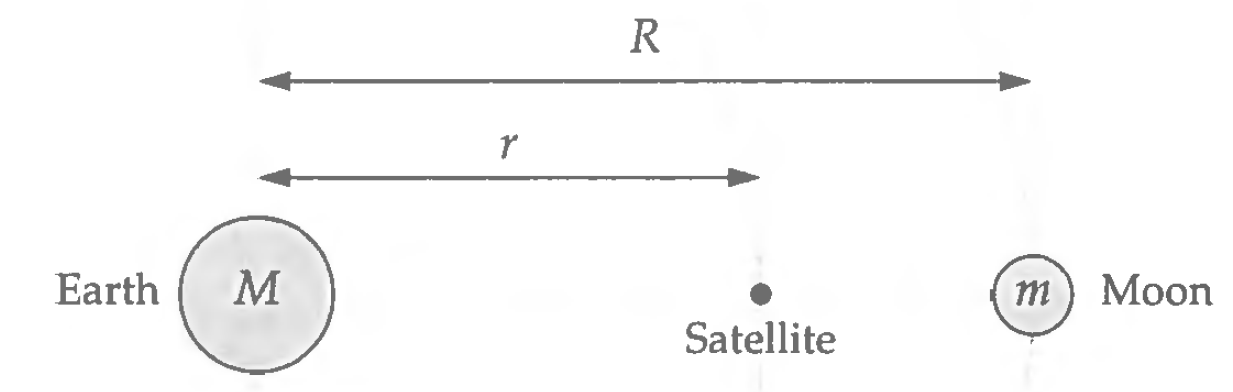


There is a magical point between the Earth and the Moon, called the $L_1$ Lagrange point, at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying alway in between the two. This works because the inward pull of the Earth and the outward pull of the Moon combine to create exactly the needed centripetal force that keeps the satellite in its orbit.

(a) Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellit, show that the distance $r$ from the center of the Earth to the $L_1$ point satisfies an equation of the form
\begin{align*}
  \frac{a}{r^2} + \frac{b}{(c-r)^2} = d r,
\end{align*}
and find $a,b,c,d$. Use $R$ for the distance between the Earth and the Moon, $M$ and $m$ for Earth and Moon masses, and $\omega$ for the angular velocity of the Moon and the satellite.

(b) Use a method of your choice to solve for the $L_1$ point to at least four significant figures.

The values of the various parameters are
\begin{align*}
  G &= 6.674 \times 10^{-11} \textrm{m}^3 \textrm{kg}^{-1} \textrm{s}^{-2},\\
  M &= 5.974\times 10^{24} \textrm{kg},\\
  m &= 7.348 \times 10^{22} \textrm{kg},\\
  R &= 3.844 \times 10^8 \textrm{m},\\
  \omega &= 2.662 \times 10^{-6} \textrm{s}^{-1}.
\end{align*}